# CRACKS DETECTION

In [2]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
from PIL import Image

In [5]:
import os
# train_dir = os.path.join(os.getcwd(), "images")
# test_dir = os.path.join(os.getcwd(), "images")
# val_dir = os.path.join(os.getcwd(), "images")
train_dir = '/Users/lisa/year3/sem2/individual_project/images/'
test_dir = '/Users/lisa/year3/sem2/individual_project/images/'
val_dir ='/Users/lisa/year3/sem2/individual_project/images/'

#  Image Sample

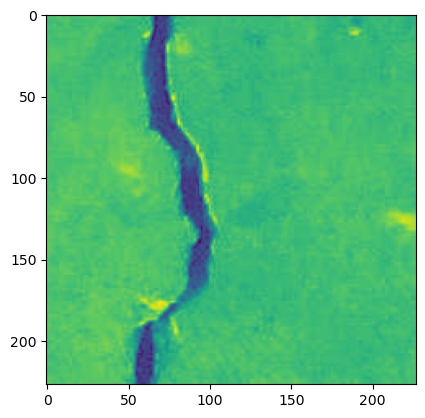

In [6]:
img_dir = '/Users/lisa/year3/sem2/individual_project/images/Positive/00016.jpg'
image =  plt.imread(img_dir)
#plt.imshow(image)
image = Image.open(img_dir).convert("L")
image = np.asarray(image)
plt.imshow(image)


# Comparison Between Coloured And Grayscale Images

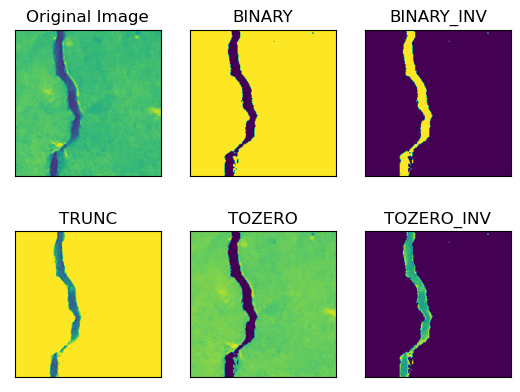

In Grayscale


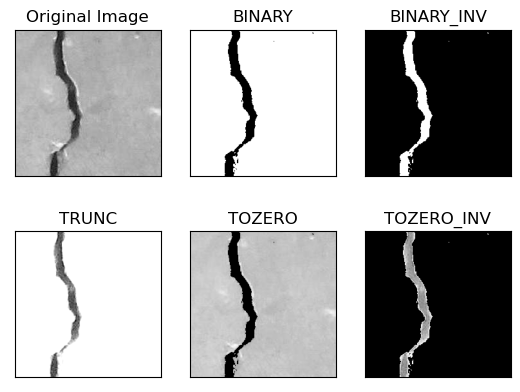

In [7]:
img = cv2.imread(img_dir,0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

print('In Grayscale')
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

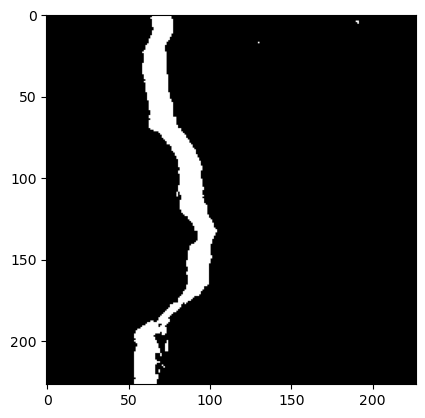

In [8]:
plt.imshow(thresh2, 'gray')

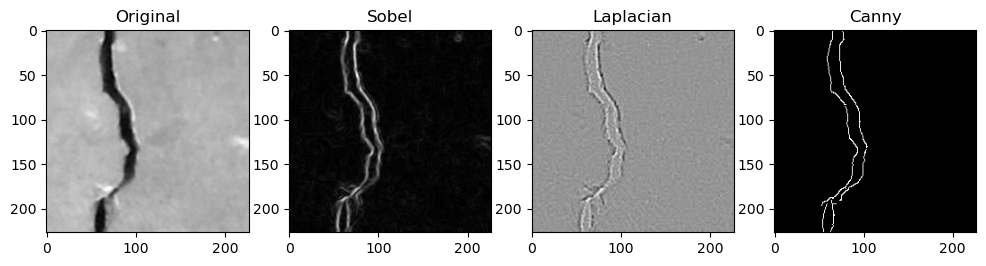

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/Users/lisa/year3/sem2/individual_project/images/Positive/00016.jpg', 0)

# img_blur=img

img_blur = cv2.GaussianBlur(img, (5, 5), 0)

# 1. Sobel 
sobelx = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3)  # X
sobely = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3)  # Y
sobel = cv2.magnitude(sobelx, sobely)

# 2. Laplacian 
laplacian = cv2.Laplacian(img_blur, cv2.CV_64F)

# 3. Canny 
canny = cv2.Canny(img_blur, 50, 150)

plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1), plt.imshow(img_blur, cmap='gray'), plt.title('Original')
plt.subplot(1, 4, 2), plt.imshow(sobel, cmap='gray'), plt.title('Sobel')
plt.subplot(1, 4, 3), plt.imshow(laplacian, cmap='gray'), plt.title('Laplacian')
plt.subplot(1, 4, 4), plt.imshow(canny, cmap='gray'), plt.title('Canny')
plt.show()


# Functions For Processing Images And Creating Data

In [ ]:

def process_image(image):

    thresh_adaptive = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                            cv2.THRESH_BINARY, 11, 2)
    img_blur = cv2.GaussianBlur(image, (5, 5), 0)

    edges = cv2.Canny(img_blur, 50, 150)


    ret, bi_inv = cv2.threshold(img_blur, 127, 255, cv2.THRESH_BINARY_INV)

  
    return thresh_adaptive, edges, bi_inv, image

def create_data(tdir_, type_, frm, to, t_data):
    colored_data=[]
    bi_inv_data=[]
    edge_data = []
    adaptive_thresh_data = []

    print('Working On '+t_data+' Data : '+type_ +'\n')
    rng = ["%05d" % x for x in range(frm, to+1)]
    for i in rng:
        dir_ =tdir_+type_+'/'+i+'.jpg'
        image = cv2.imread(dir_, 0)


        bi_inv, colored_img, edges, thresh_adaptive = process_image(image)
        colored_data.append(colored_img)
        bi_inv_data.append(bi_inv)   
        edge_data.append(edges)
        adaptive_thresh_data.append(thresh_adaptive)
        
    print('Images Processed from '+rng[0]+' to '+rng[len(rng)-1]+'\n')    
    return colored_data, bi_inv_data, edge_data, adaptive_thresh_data
#----

#fix
# def process_image(image):
#     ret,bi_inv = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)
#     #plt.imshow(bi_inv, 'gray')
#     return bi_inv, image

# def create_data(tdir_, type_, frm, to, t_data):
#     colored_data=[]
#     bi_inv_data=[]
#     # adaptive_thresh_data = []
#     print('Working On '+t_data+' Data : '+type_ +'\n')
#     rng = ["%05d" % x for x in range(frm, to+1)]
#     for i in rng:
#         dir_ =tdir_+type_+'/'+i+'.jpg'
#         image = cv2.imread(dir_, 0)
        

#         bi_inv, colored_img = process_image(image)
#         colored_data.append(colored_img)
#         bi_inv_data.append(bi_inv)  
#         # adaptive_thresh_data.append(thresh_adaptive) 
        
#     print('Images Processed from '+rng[0]+' to '+rng[len(rng)-1]+'\n')    
#     return colored_data, bi_inv_data



# Training Data : 3000 Images

In [ ]:
#edge
train_data_colr= []
train_labels=[]
train_data_inv = []
train_data_edges = []
train_data_adaptive = []

train_data_colr_pos, train_data_inv_pos, train_data_edges_pos, train_data_adaptive_pos = create_data(train_dir, 'positive', 1, 1500, 'Training')

for i in range(0, len(train_data_colr_pos)):
    train_data_colr.append(train_data_colr_pos[i])
    train_data_inv.append(train_data_inv_pos[i])
    train_data_edges.append(train_data_edges_pos[i])  # 如果使用 Canny
    train_data_adaptive.append(train_data_adaptive_pos[i])
    train_labels.append(1)



train_data_colr_neg, train_data_inv_neg, train_data_edges_neg, train_data_adaptive_neg = create_data(train_dir, 'negative', 1, 1500, 'Training')

for i in range(0, len(train_data_colr_neg)):
    train_data_colr.append(train_data_colr_neg[i])
    train_data_inv.append(train_data_inv_neg[i])
    train_data_edges.append(train_data_edges_neg[i])  # 如果使用 Canny
    train_data_adaptive.append(train_data_adaptive_neg[i])
    train_labels.append(0)



final_train_colr = np.array(train_data_colr).reshape((len(train_data_colr), 227, 227, 1))        
final_train_inv = np.array(train_data_inv).reshape((len(train_data_inv), 227, 227, 1))   
final_train_edges = np.array(train_data_edges).reshape((len(train_data_edges), 227, 227, 1))  # Canny 结果
final_train_adaptive = np.array(train_data_adaptive).reshape((len(train_data_adaptive), 227, 227, 1))

print('Shape of Training Data : ' + str(final_train_colr.shape))



#----------
# train_data_colr= []
# train_labels=[]
# train_data_inv = []
# # train_data_adaptive=[]

# positive
# train_data_colr_pos, train_data_inv_pos=  create_data(train_dir, 'positive', 1, 1500, 'Training')
# # train_data_colr_pos, train_data_inv_pos,train_data_adaptive_pos=  create_data(train_dir, 'positive', 1, 1500, 'Training')
# for i in range(0, len(train_data_colr_pos)):
#     train_data_colr.append(train_data_colr_pos[i])
#     train_data_inv.append(train_data_inv_pos[i])
#     # train_data_adaptive.append(train_data_adaptive_pos[i])
#     train_labels.append(1)

# negative
# train_data_colr_neg, train_data_inv_neg=  create_data(train_dir, 'negative', 1, 1500, 'Training')
# # train_data_colr_neg, train_data_inv_neg,train_data_adaptive_neg=  create_data(train_dir, 'negative', 1, 1500, 'Training')
# for i in range(0, len(train_data_colr_neg)):
#     train_data_colr.append(train_data_colr_neg[i])
#     train_data_inv.append(train_data_inv_neg[i])
#     # train_data_adaptive.append(train_data_adaptive_neg[i])
#     train_labels.append(0)

# NumPy
# final_train_colr = np.array(train_data_colr).reshape(((len(train_data_colr), 227, 227, 1)))        
# final_train_inv = np.array(train_data_inv).reshape(((len(train_data_inv), 227, 227, 1)))   

# print('Shape of Training Data : '+str(final_train_colr.shape))  



Working On Training Data : positive

Images Processed from 00001 to 01500

Working On Training Data : negative

Images Processed from 00001 to 01500

Shape of Training Data : (3000, 227, 227, 1)


 Positive Data / Negative Data

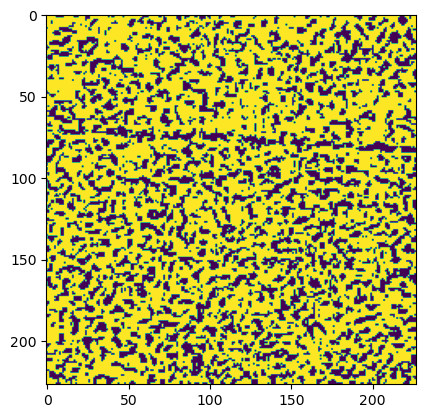

In [99]:
plt.imshow(train_data_inv_pos[15])
plt.imshow(train_data_inv_neg[15])

# Validation Data: 600

In [ ]:
# val_data_colr= []
# val_labels=[]
# val_data_inv = []

# val_data_colr_pos, val_data_inv_pos=  create_data(val_dir, 'positive', 1701, 2000, 'Validation')


# for i in range(0, len(val_data_colr_pos)):
#     val_data_colr.append(val_data_colr_pos[i])
#     val_data_inv.append(val_data_inv_pos[i])
#     val_labels.append(1)

# val_data_colr_neg, val_data_inv_neg=  create_data(val_dir, 'negative', 1701, 2000, 'Validation')

# for i in range(0, len(val_data_colr_neg)):
#     val_data_colr.append(val_data_colr_neg[i])
#     val_data_inv.append(val_data_inv_neg[i])
#     val_labels.append(0)
    
# final_val_colr = np.array(val_data_colr).reshape(((len(val_data_colr), 227, 227, 1)))    
# final_val_inv = np.array(val_data_inv).reshape(((len(val_data_inv), 227, 227, 1)))   

# print('Shape of Validation Data : '+str(final_val_colr.shape))

#---------
# edge, adaptive
val_data_colr = []
val_labels = []
val_data_inv = []
val_data_adaptive = []
val_data_edges = []

# positive
val_data_colr_pos, val_data_inv_pos, val_data_adaptive_pos, val_data_edges_pos = create_data(val_dir, 'positive', 1701, 2000, 'Validation')

for i in range(len(val_data_colr_pos)):
    val_data_colr.append(val_data_colr_pos[i])
    val_data_inv.append(val_data_inv_pos[i])
    val_data_adaptive.append(val_data_adaptive_pos[i])
    val_data_edges.append(val_data_edges_pos[i])
    val_labels.append(1)

# negative
val_data_colr_neg, val_data_inv_neg, val_data_adaptive_neg, val_data_edges_neg = create_data(val_dir, 'negative', 1701, 2000, 'Validation')

for i in range(len(val_data_colr_neg)):
    val_data_colr.append(val_data_colr_neg[i])
    val_data_inv.append(val_data_inv_neg[i])
    val_data_adaptive.append(val_data_adaptive_neg[i])
    val_data_edges.append(val_data_edges_neg[i])
    val_labels.append(0)

# NumPy
final_val_colr = np.array(val_data_colr).reshape((len(val_data_colr), 227, 227, 1))    
final_val_inv = np.array(val_data_inv).reshape((len(val_data_inv), 227, 227, 1))   
final_val_adaptive = np.array(val_data_adaptive).reshape((len(val_data_adaptive), 227, 227, 1))
final_val_edges = np.array(val_data_edges).reshape((len(val_data_edges), 227, 227, 1))

print('Shape of Validation Data : ' + str(final_val_colr.shape))


Working On Validation Data : positive

Images Processed from 01701 to 02000

Working On Validation Data : negative

Images Processed from 01701 to 02000

Shape of Validation Data : (600, 227, 227, 1)


# Testing Data : 400 Images

In [ ]:
# test_data_colr= []
# test_labels=[]
# test_data_inv = []

# test_data_colr_pos, test_data_inv_pos=  create_data(test_dir, 'positive', 1501, 1700, 'Testing')


# for i in range(0, len(test_data_colr_pos)):
#     test_data_colr.append(test_data_colr_pos[i])
#     test_data_inv.append(test_data_inv_pos[i])
#     test_labels.append(1)

# test_data_colr_neg, test_data_inv_neg=  create_data(test_dir, 'negative', 1501, 1700, 'Testing')

# for i in range(0, len(test_data_colr_neg)):
#     test_data_colr.append(test_data_colr_neg[i])
#     test_data_inv.append(test_data_inv_neg[i])
#     test_labels.append(0)
    
# final_test_colr = np.array(test_data_colr).reshape(((len(test_data_colr), 227, 227, 1)))    
# final_test_inv = np.array(test_data_inv).reshape(((len(test_data_inv), 227, 227, 1)))   

# print('Shape of Testing Data : '+str(final_test_colr.shape))


#----------
# edge, adaptive
test_data_colr = []
test_labels = []
test_data_inv = []
test_data_adaptive = []
test_data_edges = []

# positive
test_data_colr_pos, test_data_inv_pos, test_data_adaptive_pos, test_data_edges_pos = create_data(test_dir, 'positive', 1501, 1700, 'Testing')

for i in range(len(test_data_colr_pos)):
    test_data_colr.append(test_data_colr_pos[i])
    test_data_inv.append(test_data_inv_pos[i])
    test_data_adaptive.append(test_data_adaptive_pos[i])
    test_data_edges.append(test_data_edges_pos[i])
    test_labels.append(1)

# negative
test_data_colr_neg, test_data_inv_neg, test_data_adaptive_neg, test_data_edges_neg = create_data(test_dir, 'negative', 1501, 1700, 'Testing')

for i in range(len(test_data_colr_neg)):
    test_data_colr.append(test_data_colr_neg[i])
    test_data_inv.append(test_data_inv_neg[i])
    test_data_adaptive.append(test_data_adaptive_neg[i])
    test_data_edges.append(test_data_edges_neg[i])
    test_labels.append(0)

# NumPy
final_test_colr = np.array(test_data_colr).reshape((len(test_data_colr), 227, 227, 1))    
final_test_inv = np.array(test_data_inv).reshape((len(test_data_inv), 227, 227, 1))   
final_test_adaptive = np.array(test_data_adaptive).reshape((len(test_data_adaptive), 227, 227, 1))
final_test_edges = np.array(test_data_edges).reshape((len(test_data_edges), 227, 227, 1))

print('Shape of Testing Data : ' + str(final_test_colr.shape))


Working On Testing Data : positive

Images Processed from 01501 to 01700

Working On Testing Data : negative

Images Processed from 01501 to 01700

Shape of Testing Data : (400, 227, 227, 1)


In [17]:
train_labels[20]

1

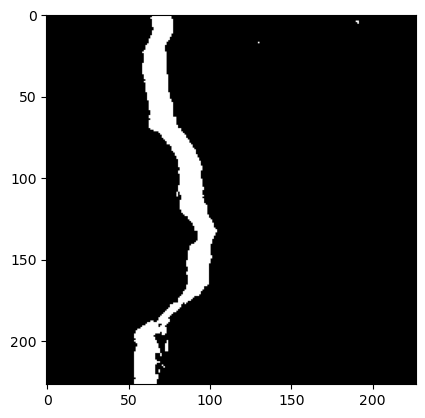

In [18]:
plt.imshow(train_data_inv[15], 'gray')

# SVM

In [ ]:

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import numpy as np
import random


X = final_train_edges.reshape((final_train_edges.shape[0], -1))  
y = np.array(train_labels)


X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size=0.2, random_state=42)


svm_model = SVC(kernel='linear')  
# svm_model.fit(X_train, y_train)

#svm_model.fit(X_train_svm, y_train_svm)


batch_size = 1000 
num_batches = len(X_train_svm) // batch_size

for i in tqdm(range(num_batches), desc="Training SVM", unit="batch"):
    start = i * batch_size
    end = start + batch_size
    svm_model.fit(X_train_svm[start:end], y_train_svm[start:end])

y_pred = svm_model.predict(X_test_svm)

accuracy = accuracy_score(y_test_svm, y_pred)
print(f"SVM classification accuracy: {accuracy:.4f}")


#-------
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from tqdm import tqdm
# import numpy as np
# import random

# X = final_train_inv.reshape((final_train_inv.shape[0], -1))
# y = np.array(train_labels)  

# indices = np.arange(len(X)) 

# X_train_svm, X_test_svm, y_train_svm, y_test_svm,idx_train, idx_test = train_test_split(X, y, indices, test_size=0.2, random_state=42)
# # X_train_svm, X_test_svm, y_train_svm = train_test_split(X, y, test_size=0.2, random_state=42)
# # SVM
# svm_model = SVC(kernel='linear')  
# # svm_model.fit(X_train, y_train)

# #svm_model.fit(X_train_svm, y_train_svm)


# batch_size = 1000  
# num_batches = len(X_train_svm) // batch_size

# for i in tqdm(range(num_batches), desc="Training SVM", unit="batch"): 
#     start = i * batch_size
#     end = start + batch_size
#     svm_model.fit(X_train_svm[start:end], y_train_svm[start:end])


# y_pred = svm_model.predict(X_test_svm)


# accuracy = accuracy_score(y_test_svm, y_pred)
# print(f"SVM classification accuracy: {accuracy:.4f}")


Training SVM: 100%|██████████| 2/2 [00:15<00:00,  7.98s/batch]


SVM classification accuracy: 0.9000


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


accuracy = accuracy_score(y_test_svm, y_pred)
precision = precision_score(y_test_svm, y_pred)
recall = recall_score(y_test_svm, y_pred)
f1 = f1_score(y_test_svm, y_pred)


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

from sklearn.metrics import classification_report

print(classification_report(y_test_svm, y_pred))



Accuracy: 0.9000
Precision: 0.9703
Recall: 0.8339
F1 Score: 0.8969
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       287
           1       0.97      0.83      0.90       313

    accuracy                           0.90       600
   macro avg       0.91      0.90      0.90       600
weighted avg       0.91      0.90      0.90       600



# Test SVM

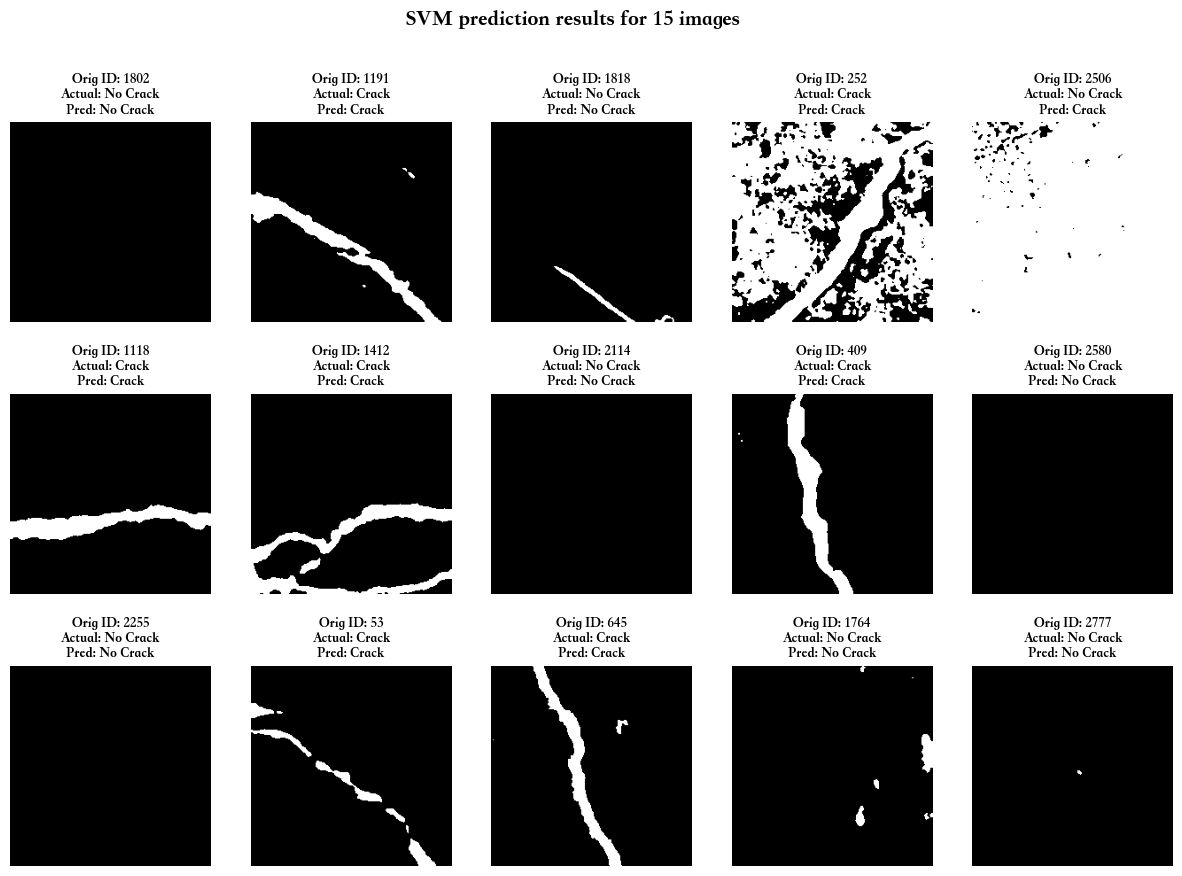

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


num_images = 15
images = X_test_svm[:num_images].reshape((num_images, 227, 227))  
labels = y_test_svm[:num_images] 
predictions = svm_model.predict(X_test_svm[:num_images])  


font_path = "/System/Library/Fonts/Supplemental/Songti.ttc"  
font_prop = fm.FontProperties(fname=font_path, size=14)
fig, axes = plt.subplots(3, 5, figsize=(15, 10)) 
fig.suptitle("SVM prediction results for 15 images", fontsize=16, fontproperties=font_prop)

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
    true_label = "Crack" if labels[i] == 1 else "No Crack"
    pred_label = "Crack" if predictions[i] == 1 else "No Crack"
    original_index = idx_test[i]+1  
    #ax.set_title(f"Image: {i}\nActual: {true_label}\nPrediction: {pred_label}", fontsize=10, fontproperties=font_prop)
    ax.set_title(f"Orig ID: {original_index}\nActual: {true_label}\nPred: {pred_label}",fontsize=10, fontproperties=font_prop)
    ax.axis("off")

plt.show()

In [ ]:

# all_original_images = np.array(train_data_inv)  


# from sklearn.model_selection import train_test_split

# indices = np.arange(len(y)) 
# X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
#     X, y, indices, test_size=0.2, random_state=42
# )


# num_images = 15
# fig, axes = plt.subplots(3, 5, figsize=(15, 10))
# fig.suptitle("SVM Predictions on Original Images", fontsize=16, fontproperties=font_prop)

# for i, ax in enumerate(axes.flat):
#     original_img = all_original_images[idx_test[i]]  
#     true_label = "Crack" if y_test[i] == 1 else "No Crack"
#     pred_label = "Crack" if svm_model.predict([X_test[i]])[0] == 1 else "No Crack"
    
#     ax.imshow(original_img, cmap='gray')
#     ax.set_title(f"Image {i}\nActual: {true_label}\nPrediction: {pred_label}", fontsize=10, fontproperties=font_prop)
#     ax.axis('off')

# plt.tight_layout()
# plt.show()





# Random Forest

In [ ]:
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from tqdm import tqdm
# import numpy as np


# # final_train_inv
# #X = final_train_edges.reshape((final_train_edges.shape[0], -1))  
# X = final_train_inv.reshape((final_train_inv.shape[0], -1))  
# y = np.array(train_labels) 


# X_train_rf, X_test_rf, y_train_rf, y_test_rf,idx_train, idx_test = train_test_split(X, y, indices, test_size=0.2, random_state=42)



# # rf_model = RandomForestClassifier(n_estimators=100)
# rf_model = RandomForestClassifier(n_estimators=50, warm_start=True, random_state=42)


# # svm_model.fit(X_train, y_train)



# batch_size = 1000  
# num_batches = len(X_train_rf) // batch_size

# for i in tqdm(range(num_batches), desc="Training rf", unit="batch"):
#     start = i * batch_size
#     end = start + batch_size
#     # svm_model.fit(X_train[start:end], y_train[start:end])
#     # rf_model.fit(X_train_rf[start:end], y_train_rf[start:end])
#     rf_model.fit(X_train_rf, y_train_rf)


# y_pred = rf_model.predict(X_test_rf)


# accuracy = accuracy_score(y_test_rf, y_pred)
# print(f"rf classification accuracy: {accuracy:.4f}")



# # plt.imshow(X_train_rf[0].reshape(227, 227), cmap='gray')
# # plt.title(f"Label: {y_train_rf[0]}")
# # plt.show()

#-------
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import numpy as np



X = final_train_edges.reshape((final_train_edges.shape[0], -1)) 
y = np.array(train_labels) 


X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)


# rf_model = RandomForestClassifier(n_estimators=100)
rf_model = RandomForestClassifier(n_estimators=50, warm_start=True, random_state=42)

# svm_model.fit(X_train, y_train)


batch_size = 1000 
num_batches = len(X_train_rf) // batch_size

for i in tqdm(range(num_batches), desc="Training rf", unit="batch"):
    start = i * batch_size
    end = start + batch_size
    # svm_model.fit(X_train[start:end], y_train[start:end])
    # rf_model.fit(X_train_rf[start:end], y_train_rf[start:end])
    rf_model.fit(X_train_rf, y_train_rf)


y_pred = rf_model.predict(X_test_rf)

accuracy = accuracy_score(y_test_rf, y_pred)
print(f"rf classification accuracy: {accuracy:.4f}")



# plt.imshow(X_train_rf[0].reshape(227, 227), cmap='gray')
# plt.title(f"Label: {y_train_rf[0]}")
# plt.show()



Training rf:  50%|█████     | 1/2 [00:03<00:03,  3.42s/batch]/Users/lisa/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
Training rf: 100%|██████████| 2/2 [00:03<00:00,  1.80s/batch]


rf classification accuracy: 0.9633


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


accuracy = accuracy_score(y_test_svm, y_pred)
precision = precision_score(y_test_svm, y_pred)
recall = recall_score(y_test_svm, y_pred)
f1 = f1_score(y_test_svm, y_pred)


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

from sklearn.metrics import classification_report

print(classification_report(y_test_svm, y_pred))

Accuracy: 0.9633
Precision: 0.9533
Recall: 0.9776
F1 Score: 0.9653
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       287
           1       0.95      0.98      0.97       313

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



# Test RF

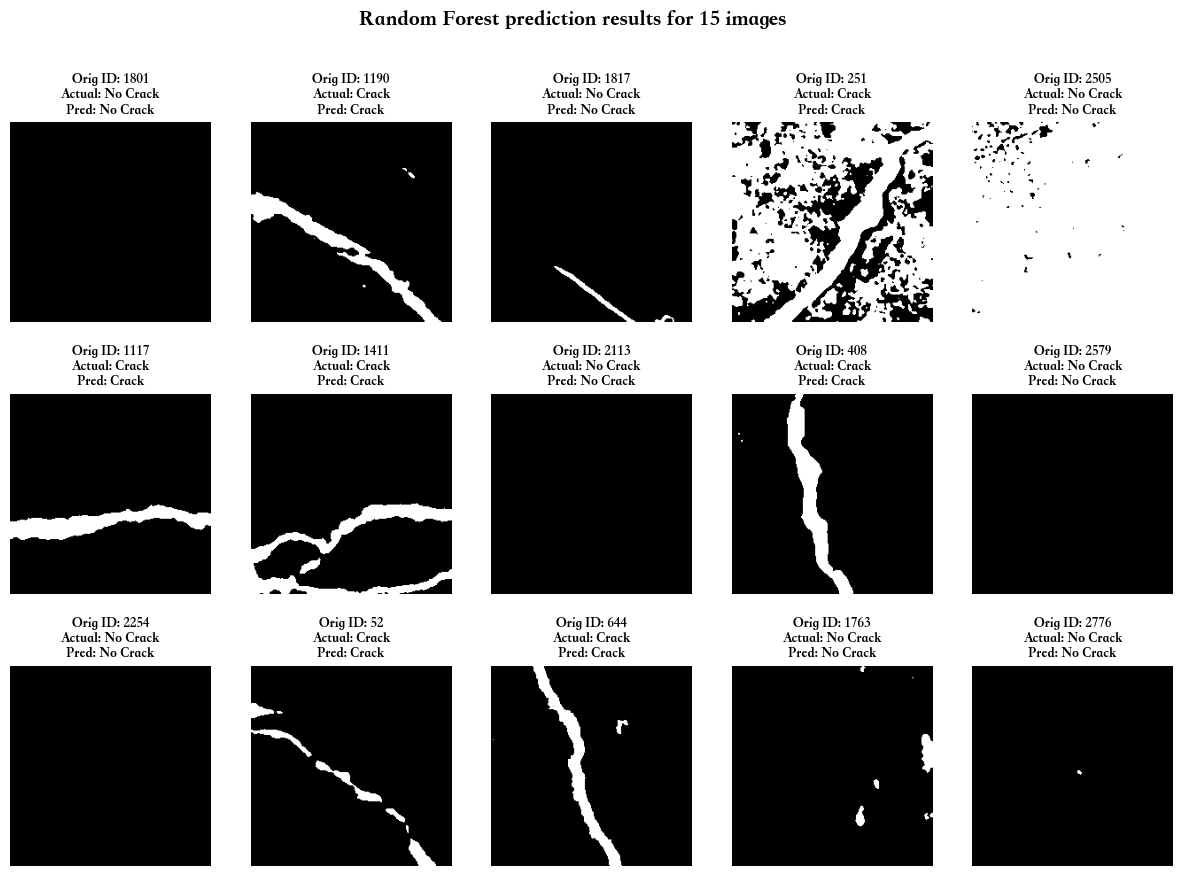

In [ ]:
import matplotlib.pyplot as plt

num_images = 15
images = X_test_rf[:num_images].reshape((num_images, 227, 227))
labels = y_test_rf[:num_images]
predictions = rf_model.predict(X_test_rf[:num_images])

font_path = "/System/Library/Fonts/Supplemental/Songti.ttc"  
font_prop = fm.FontProperties(fname=font_path, size=14)
fig, axes = plt.subplots(3, 5, figsize=(15, 10)) 
fig.suptitle("Random Forest prediction results for 15 images", fontsize=16, fontproperties=font_prop)

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
    true_label = "Crack" if labels[i] == 1 else "No Crack"
    pred_label = "Crack" if predictions[i] == 1 else "No Crack"
    original_index = idx_test[i]  
    ax.set_title(f"Image: {i}\n Actual: {true_label}\nPrediction: {pred_label}", fontsize=10, fontproperties=font_prop)
    ax.set_title(f"Orig ID: {original_index}\nActual: {true_label}\nPred: {pred_label}",fontsize=10, fontproperties=font_prop)
    ax.axis("off")

plt.show()




# Model Creation (Convolutional Neural Networks)

In [28]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import load_model
from keras.optimizers import RMSprop

In [ ]:

final_train_inv = np.array(final_train_inv)
final_val_inv = np.array(final_val_inv)


if len(final_train_inv.shape) == 3:
    final_train_inv = np.expand_dims(final_train_inv, axis=-1)
    final_val_inv = np.expand_dims(final_val_inv, axis=-1)


final_train_inv = final_train_inv.astype('float32') / 255.0
final_val_inv = final_val_inv.astype('float32') / 255.0
final_test_inv = final_test_inv / 255.0


train_labels = np.array(train_labels)
val_labels = np.array(val_labels)

print("Train data shape:", final_train_inv.shape)
print("Validation data shape:", final_val_inv.shape)
print("Train labels shape:", train_labels.shape)
print("Unique train labels:", np.unique(train_labels))
print("Unique validation labels:", np.unique(val_labels))
# print(final_train_inv)
print("Test data min:", final_test_inv.min())
print("Test data max:", final_test_inv.max())

Train data shape: (3000, 227, 227, 1)
Validation data shape: (600, 227, 227, 1)
Train labels shape: (3000,)
Unique train labels: [0 1]
Unique validation labels: [0 1]
Test data min: 0.0
Test data max: 1.0


In [109]:
input_shape = (227, 227, 1)
Wh = 3
Ww = 3

In [ ]:

model = Sequential() 

model.add(Conv2D(input_shape=input_shape , data_format="channels_last", kernel_size=(Wh,Ww), filters=32, padding='same')) 
model.add(Activation('relu')) 

model.add(MaxPooling2D(pool_size=(2, 2))) 


model.add(Conv2D(32, (3, 3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.5)) 

model.add(Dense(1)) 
model.add(Activation('sigmoid'))






/Users/lisa/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


# img = mpimg.imread('/Users/lisa/year3/sem2/individual_project/images/Positive/00016.jpg')

# plt.figure(figsize=(4,4))
# plt.imshow(img)
# plt.axis('off')
# plt.show()
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 227, 227, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 227, 227, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 113, 113, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 111, 111, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 53, 53, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 53, 53, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │     2,768,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,797,089 (10.67 MB)

 Trainable params: 2,797,089 (10.67 MB)

 Non-trainable params: 0 (0.00 B)

 Positive Data / Negative Data

In [ ]:

print("Training label distribution:", np.bincount(train_labels))
print("Validation label distribution:", np.bincount(val_labels))

print("Training data range:", final_train_inv.min(), final_train_inv.max())
print("Validation data range:", final_val_inv.min(), final_val_inv.max())



Training label distribution: [1500 1500]
Validation label distribution: [300 300]
Training data range: 0.0 1.0
Validation data range: 0.0 1.0


In [113]:
batch_size = 250
epochs = 30

#  Training Process CNN

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', 'precision', 'recall'])


model.fit(final_train_inv, train_labels, batch_size=batch_size, epochs=epochs, verbose=1, 
          validation_data=(final_val_inv, val_labels))



Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 90s 7s/step - accuracy: 0.4938 - loss: 2.3164 - val_accuracy: 0.5000 - val_loss: 0.6924
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 83s 7s/step - accuracy: 0.5243 - loss: 0.6908 - val_accuracy: 0.7850 - val_loss: 0.6700
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 69s 6s/step - accuracy: 0.5575 - loss: 0.6834 - val_accuracy: 0.5000 - val_loss: 0.6733
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 68s 6s/step - accuracy: 0.5209 - loss: 0.6884 - val_accuracy: 0.5000 - val_loss: 0.6379
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 70s 6s/step - accuracy: 0.5958 - loss: 0.6783 - val_accuracy: 0.5500 - val_loss: 0.5987
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 77s 7s/step - accuracy: 0.5658 - loss: 0.6671 - val_accuracy: 0.9117 - val_loss: 0.5714
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 87s 7s/step - accuracy: 0.7342 - loss: 0.6027 - val_accuracy: 0.8833 - val_loss: 0.4969
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 68s 6s/step - accuracy: 0.7953 - loss: 0.5017 - val_accuracy: 0.9150 - val_loss:

#  MobileNetV2 迁移学习模型

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model


import numpy as np


final_train_inv_rgb = np.repeat(final_train_inv, 3, axis=-1)
final_val_inv_rgb = np.repeat(final_val_inv, 3, axis=-1)

print("New shape:", final_train_inv_rgb.shape) 


base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')


base_model.trainable = False  

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)  


model = Model(inputs=base_model.input, outputs=output)


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


import tensorflow as tf
final_train_resized = tf.image.resize(final_train_inv_rgb, (224, 224))
final_val_resized = tf.image.resize(final_val_inv_rgb, (224, 224))


model.fit(final_train_resized, train_labels, batch_size=64, epochs=20, validation_data=(final_val_resized, val_labels))


New shape: (3000, 227, 227, 3)
Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 777ms/step - accuracy: 0.8496 - loss: 0.3335 - val_accuracy: 0.9867 - val_loss: 0.0548
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 36s 765ms/step - accuracy: 0.9784 - loss: 0.0717 - val_accuracy: 0.9917 - val_loss: 0.0391
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 36s 763ms/step - accuracy: 0.9728 - loss: 0.0745 - val_accuracy: 0.9917 - val_loss: 0.0316
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 35s 738ms/step - accuracy: 0.9865 - loss: 0.0506 - val_accuracy: 0.9900 - val_loss: 0.0325
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 678ms/step - accuracy: 0.9847 - loss: 0.0471 - val_accuracy: 0.9900 - val_loss: 0.0284
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 672ms/step - accuracy: 0.9850 - loss: 0.0385 - val_accuracy: 0.9900 - val_loss: 0.0262
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 31s 670ms/step - accuracy: 0.9832 - loss: 0.0429 - val_accuracy: 0.9917 - val_loss: 0.0245
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 683ms/step - accuracy: 0

#   ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

import numpy as np
import tensorflow as tf


final_train_rgb = np.repeat(final_train_inv, 3, axis=-1)
final_val_rgb = np.repeat(final_val_inv, 3, axis=-1)


final_train_resized = tf.image.resize(final_train_rgb, (224, 224))
final_val_resized = tf.image.resize(final_val_rgb, (224, 224))


base_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')


base_model.trainable = False  


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)  


model = Model(inputs=base_model.input, outputs=output)


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(final_train_resized, train_labels, batch_size=64, epochs=20, validation_data=(final_val_resized, val_labels))


Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.6654 - loss: 0.6164 - val_accuracy: 0.9150 - val_loss: 0.3175
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.8599 - loss: 0.3663 - val_accuracy: 0.9383 - val_loss: 0.2526
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 119s 3s/step - accuracy: 0.8960 - loss: 0.2972 - val_accuracy: 0.9433 - val_loss: 0.2117
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 119s 3s/step - accuracy: 0.9186 - loss: 0.2298 - val_accuracy: 0.9467 - val_loss: 0.1932
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.9169 - loss: 0.2157 - val_accuracy: 0.9067 - val_loss: 0.2119
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 122s 3s/step - accuracy: 0.9177 - loss: 0.2245 - val_accuracy: 0.9400 - val_loss: 0.1593
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.9399 - loss: 0.1762 - val_accuracy: 0.9417 - val_loss: 0.1715
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 124s 3s/step - accuracy: 0.9302 - loss: 0.1857 - val_accuracy: 0.9467 - v

#   EfficientNetB0

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

import numpy as np
import tensorflow as tf

final_train_rgb = np.repeat(final_train_inv, 3, axis=-1)
final_val_rgb = np.repeat(final_val_inv, 3, axis=-1)


final_train_resized = tf.image.resize(final_train_rgb, (224, 224))
final_val_resized = tf.image.resize(final_val_rgb, (224, 224))


base_model = EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')


base_model.trainable = False  


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)  


model = Model(inputs=base_model.input, outputs=output)


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(final_train_resized, train_labels, batch_size=64, epochs=20, validation_data=(final_val_resized, val_labels))



Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.5285 - loss: 0.7082 - val_accuracy: 0.6300 - val_loss: 0.6658
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.5621 - loss: 0.6814 - val_accuracy: 0.6450 - val_loss: 0.6641
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 46s 981ms/step - accuracy: 0.5718 - loss: 0.6760 - val_accuracy: 0.6483 - val_loss: 0.6595
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.6008 - loss: 0.6756 - val_accuracy: 0.6050 - val_loss: 0.6651
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5888 - loss: 0.6720 - val_accuracy: 0.6483 - val_loss: 0.6619
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.5984 - loss: 0.6735 - val_accuracy: 0.6217 - val_loss: 0.6597
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.5878 - loss: 0.6805 - val_accuracy: 0.5950 - val_loss: 0.6614
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.5844 - loss: 0.6768 - val_accuracy: 0.6317 - val_lo

#   DenseNet121

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

import numpy as np
import tensorflow as tf


final_train_rgb = np.repeat(final_train_inv, 3, axis=-1)
final_val_rgb = np.repeat(final_val_inv, 3, axis=-1)


final_train_resized = tf.image.resize(final_train_rgb, (224, 224))
final_val_resized = tf.image.resize(final_val_rgb, (224, 224))

base_model = DenseNet121(input_shape=(224, 224, 3), include_top=False, weights='imagenet')


base_model.trainable = False  


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)  


model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(final_train_resized, train_labels, batch_size=64, epochs=20, validation_data=(final_val_resized, val_labels))



Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 136s 3s/step - accuracy: 0.7658 - loss: 0.4532 - val_accuracy: 0.9883 - val_loss: 0.0671
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.9674 - loss: 0.1089 - val_accuracy: 0.9933 - val_loss: 0.0369
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - accuracy: 0.9735 - loss: 0.0820 - val_accuracy: 0.9967 - val_loss: 0.0239
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.9782 - loss: 0.0687 - val_accuracy: 0.9933 - val_loss: 0.0266
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.9824 - loss: 0.0652 - val_accuracy: 0.9967 - val_loss: 0.0176
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 126s 3s/step - accuracy: 0.9833 - loss: 0.0467 - val_accuracy: 0.9950 - val_loss: 0.0179
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 126s 3s/step - accuracy: 0.9854 - loss: 0.0426 - val_accuracy: 0.9950 - val_loss: 0.0180
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 126s 3s/step - accuracy: 0.9880 - loss: 0.0398 - val_accuracy: 0.9933 - v

# Accuracy And Loss 

In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score


test_labels = np.array(test_labels)


y_pred = (model.predict(final_test_inv) > 0.5).astype("int32").flatten()

loss, acc = model.evaluate(final_test_inv, test_labels, verbose=0)


print(f"Test Accuracy : {acc:.4f}")
print(f"Test Loss     : {loss:.4f}")
print(f"Precision     : {precision_score(test_labels, y_pred):.4f}")
print(f"Recall        : {recall_score(test_labels, y_pred):.4f}")
print(f"F1 Score      : {f1_score(test_labels, y_pred):.4f}")


print("\n📝 Full Classification Report:")
print(classification_report(test_labels, y_pred, target_names=['No Crack', 'Crack']))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, y_pred)
print("Confusion Matrix:\n", cm)


ValueError: Input 0 of layer "functional_40" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 227, 227)

In [ ]:
#ResNet50
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import numpy as np
import tensorflow as tf


final_test_rgb = np.repeat(final_test_inv, 3, axis=-1)


final_test_resized = tf.image.resize(final_test_rgb, (224, 224))


y_pred_prob = model.predict(final_test_resized)
y_pred = (y_pred_prob > 0.5).astype("int32").flatten()


loss, acc = model.evaluate(final_test_resized, test_labels, verbose=0)
print(f"Test Accuracy: {acc:.4f}")
print(f"Test Loss    : {loss:.4f}")


print(f"Precision    : {precision_score(test_labels, y_pred):.4f}")
print(f"Recall       : {recall_score(test_labels, y_pred):.4f}")
print(f"F1 Score     : {f1_score(test_labels, y_pred):.4f}")


print("\nFull classification report:")
print(classification_report(test_labels, y_pred, target_names=['No Crack', 'Crack']))


unique_pred, pred_counts = np.unique(y_pred, return_counts=True)
unique_labels, label_counts = np.unique(test_labels, return_counts=True)
print("Test Labels Distribution:", dict(zip(unique_labels, label_counts)))
print("Predicted Labels Distribution:", dict(zip(unique_pred, pred_counts)))


13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step 
Test Accuracy: 0.9625
Test Loss    : 0.1058
Precision    : 0.9947
Recall       : 0.9300
F1 Score     : 0.9612

Full classification report:
              precision    recall  f1-score   support

    No Crack       0.93      0.99      0.96       200
       Crack       0.99      0.93      0.96       200

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400

Test Labels Distribution: {0: 200, 1: 200}
Predicted Labels Distribution: {0: 213, 1: 187}


In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score


y_pred = (model.predict(final_test_inv) > 0.5).astype("int32").flatten()


loss, acc = model.evaluate(final_test_inv, test_labels, verbose=0)
print(f"Test Accuracy: {acc:.4f}")
print(f"Test Loss: {loss:.4f}")
print(f"Precision: {precision_score(test_labels, y_pred):.4f}")
print(f"Recall   : {recall_score(test_labels, y_pred):.4f}")
print(f"F1 Score : {f1_score(test_labels, y_pred):.4f}")


print("\nFull classification report:")
print(classification_report(test_labels, y_pred, target_names=['No Crack', 'Crack']))

import numpy as np


unique_pred, pred_counts = np.unique(y_pred, return_counts=True)
unique_labels, label_counts = np.unique(test_labels, return_counts=True)
print("Test Labels Distribution:", dict(zip(unique_labels, label_counts)))
print("Predicted Labels Distribution:", dict(zip(unique_pred, pred_counts)))


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step


ValueError: Unrecognized data type: x=[[[[0.]
   [0.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[0.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [1.]]

  [[0.]
   [0.]
   [1.]
   ...
   [0.]
   [0.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [1.]
   [1.]
   ...
   [0.]
   [0.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [0.]
   [1.]
   [1.]]

  ...

  [[0.]
   [0.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[0.]
   [0.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[0.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]]


 [[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [0.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [0.]]

  [[0.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [1.]
   [1.]
   [1.]]

  [[0.]
   [1.]
   [1.]
   ...
   [0.]
   [0.]
   [0.]]

  [[1.]
   [1.]
   [1.]
   ...
   [0.]
   [0.]
   [0.]]]


 ...


 [[[0.]
   [0.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]]


 [[[1.]
   [1.]
   [0.]
   ...
   [1.]
   [1.]
   [0.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]]


 [[[0.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [0.]]

  [[0.]
   [0.]
   [1.]
   ...
   [1.]
   [1.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [1.]
   [1.]
   [0.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[0.]
   [0.]
   [0.]
   ...
   [1.]
   [1.]
   [1.]]]] (of type <class 'numpy.ndarray'>)

In [141]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[199   1]
 [ 14 186]]


#  Image Predictor (Functions)

In [ ]:
def predict_image_util(final_pred_colr, final_pred_inv):

    inputs = [final_pred_colr, final_pred_inv]
    raw_predicted_label = model.predict(inputs, batch_size=None, verbose=0, steps=None)[0][0]


    predicted_label = 1 if raw_predicted_label >= 0.8 else 0
    predicted_label_str = 'Crack' if predicted_label == 1 else 'No Crack'


    print(f"Raw Predicted Label(Numeric): {raw_predicted_label}")
    print(f"\nPredicted Label: {predicted_label_str}") 


In [ ]:
from_data_dir = '/Users/lisa/year3/sem2/individual_project/images/'  # Directory

def predict_image2(type_, num):

    result = create_data(from_data_dir, type_, num, num + 1, 'Predictable')
    pred_data_colr_, pred_data_inv_ = result[0], result[1] 


    pred_data_colr = [pred_data_colr_[0]]
    pred_data_inv = [pred_data_inv_[0]]


    final_pred_colr = np.array(pred_data_colr).reshape((1, 227, 227, 1))  #  (1, 227, 227, 1)
    final_pred_inv = np.array(pred_data_inv).reshape((1, 227, 227, 1))    #  (1, 227, 227, 1)

    predict_image_util(final_pred_colr, final_pred_inv)


    plt.imshow(pred_data_colr_[0])
    plt.title(f"Image {num} - {type_} data", fontsize=10)
    plt.axis('off')  # Hide axes for better visualization
    plt.show()

    

#  Image Predictor

Working On Predictable Data : negative

Images Processed from 01231 to 01232

Raw Predicted Label(Numeric): 1.0

Predicted Label: Crack


/Users/lisa/opt/anaconda3/lib/python3.9/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(1, 227, 227, 1))', 'Tensor(shape=(1, 227, 227, 1))')
  warnings.warn(msg)


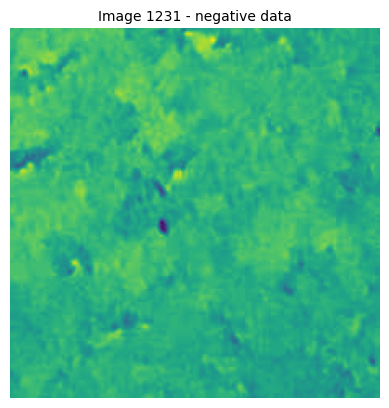

In [ ]:
predict_image2('negative', 1231)  
predict_image2('positive', 23)      

#  批量测试

#  ResNet50

Predicting for positive images:
Working On Predictable Data : Positive

Images Processed from 00001 to 00001

Image 1 | Raw Pred: 0.4672 → Label: No Crack
Working On Predictable Data : Positive

Images Processed from 00002 to 00002

Image 2 | Raw Pred: 0.4531 → Label: No Crack
Working On Predictable Data : Positive

Images Processed from 00003 to 00003

Image 3 | Raw Pred: 0.4416 → Label: No Crack
Working On Predictable Data : Positive

Images Processed from 00004 to 00004

Image 4 | Raw Pred: 0.4466 → Label: No Crack
Working On Predictable Data : Positive

Images Processed from 00005 to 00005

Image 5 | Raw Pred: 0.4564 → Label: No Crack
Working On Predictable Data : Positive

Images Processed from 00006 to 00006

Image 6 | Raw Pred: 0.4545 → Label: No Crack
Working On Predictable Data : Positive

Images Processed from 00007 to 00007

Image 7 | Raw Pred: 0.4401 → Label: No Crack
Working On Predictable Data : Positive

Images Processed from 00008 to 00008

Image 8 | Raw Pred: 0.4428 → 

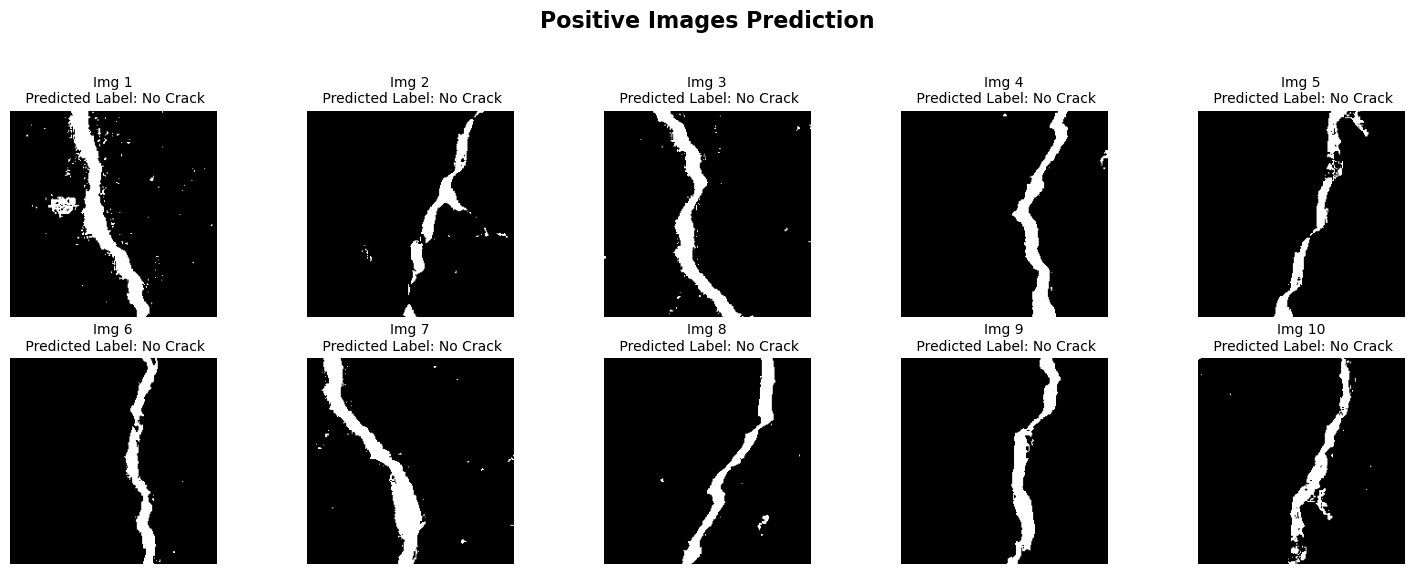


Predicting for negative images:
Working On Predictable Data : Negative

Images Processed from 00001 to 00001

Image 1 | Raw Pred: 0.3898 → Label: No Crack
Working On Predictable Data : Negative

Images Processed from 00002 to 00002

Image 2 | Raw Pred: 0.3877 → Label: No Crack
Working On Predictable Data : Negative

Images Processed from 00003 to 00003

Image 3 | Raw Pred: 0.3918 → Label: No Crack
Working On Predictable Data : Negative

Images Processed from 00004 to 00004

Image 4 | Raw Pred: 0.3902 → Label: No Crack
Working On Predictable Data : Negative

Images Processed from 00005 to 00005

Image 5 | Raw Pred: 0.3909 → Label: No Crack
Working On Predictable Data : Negative

Images Processed from 00006 to 00006

Image 6 | Raw Pred: 0.3892 → Label: No Crack
Working On Predictable Data : Negative

Images Processed from 00007 to 00007

Image 7 | Raw Pred: 0.3921 → Label: No Crack
Working On Predictable Data : Negative

Images Processed from 00008 to 00008

Image 8 | Raw Pred: 0.3987 →

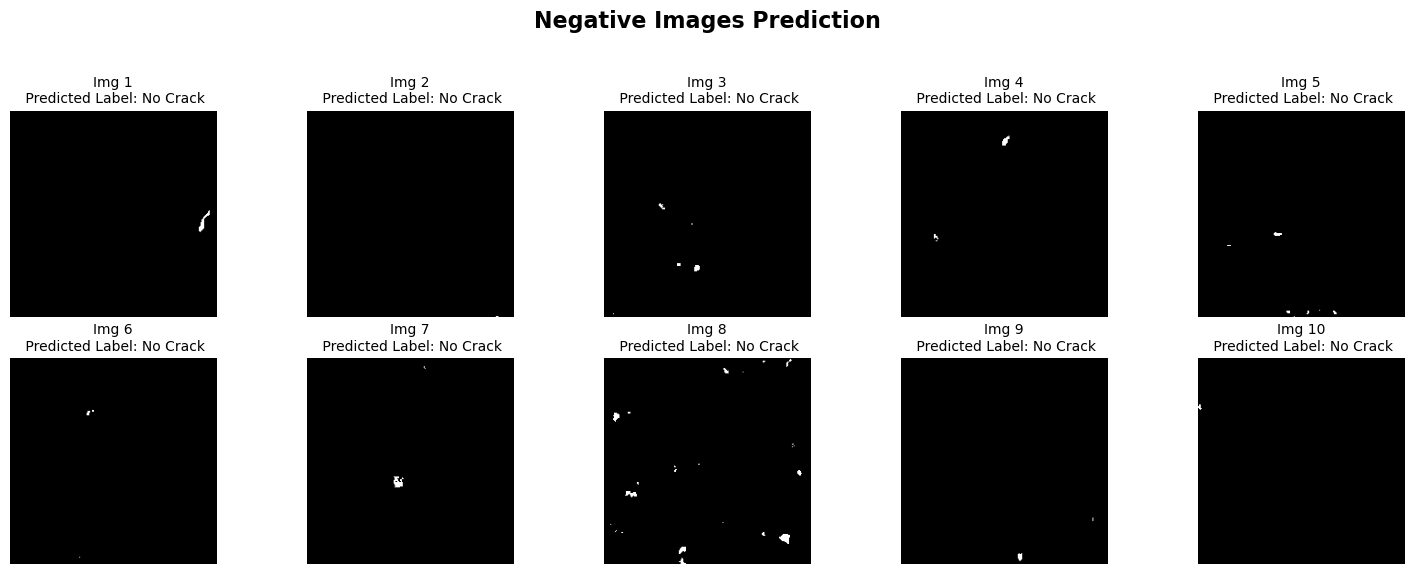

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def predict_batch_images(type_, start_num, end_num):
    images_per_row = 5
    total_images = end_num - start_num + 1
    rows = (total_images + images_per_row - 1) // images_per_row  

    fig, axes = plt.subplots(nrows=rows, ncols=images_per_row, figsize=(15, rows * 3))
    axes = axes.flatten()
    fig.suptitle(f'{type_} Images Prediction', fontsize=16, fontweight='bold')

    for idx, num in enumerate(range(start_num, end_num + 1)):
    
        result = create_data(from_data_dir, type_, num, num, 'Predictable')
        pred_data_colr_, pred_data_inv_ = result[0], result[1]

   
        if not pred_data_inv_ or pred_data_inv_[0] is None:
            print(f"Skipping image {num} due to load failure.")
            continue

   
        img_gray = pred_data_colr_[0]
        _, img_binary = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)


        img_input = pred_data_inv_[0]  # shape (227, 227)
        img_rgb = np.repeat(img_input[..., np.newaxis], 3, axis=-1)  # (227, 227, 3)
        img_resized = tf.image.resize(img_rgb, (224, 224)) / 255.0
        img_ready = np.expand_dims(img_resized, axis=0)  # (1, 224, 224, 3)

  
        raw_pred = model.predict(img_ready, verbose=0)[0][0]
        predicted_label = 1 if raw_pred >= 0.5 else 0
        predicted_label_str = 'Crack' if predicted_label else 'No Crack'

        print(f"Image {num} | Raw Pred: {raw_pred:.4f} → Label: {predicted_label_str}")

  
        ax = axes[idx]
        ax.imshow(img_binary, cmap='gray')
        ax.axis('off')
        ax.set_title(f"Img {num}\n Predicted Label: {predicted_label_str}", fontsize=10)


    for j in range(total_images, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


print("Predicting for positive images:")
predict_batch_images('Positive', 1, 10)

print("\nPredicting for negative images:")
predict_batch_images('Negative', 1, 10)


#  CNN


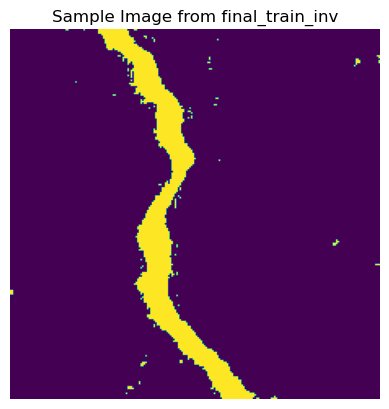

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


img = final_train_inv[2].reshape(227, 227)  


plt.imshow(img)  
plt.title("Sample Image from final_train_inv")
plt.axis("off")  
plt.show()


#  Saving Model

In [34]:
model.save_weights('third_30_.weights.h5')
model.save('third_30.h5')